#### Handle missing values if any

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib


In [4]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]
data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.head(10)

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   
5   37           Private  284582    Masters             14   
6   49           Private  160187        9th              5   
7   52  Self-emp-not-inc  209642    HS-grad              9   
8   31           Private   45781    Masters             14   
9   42           Private  159449  Bachelors             13   

          marital-status         occupation   relationship   race     sex  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4     Married-civ-spouse     Prof-specialty           Wife  Black  Female   
5     Married-civ-spouse    Exec-managerial           Wife  White  Female   
6  Married-spouse-absent      Other-service  Not-in-family  Black  Female   
7     Married-civ-spouse    Exec-managerial        Husband  White    Male   
8          Never-married     Prof-specialty  Not-in-family  White  Female   
9     Married-civ-spouse    Exec-managerial        Husband  White    Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K  
5             0             0              40  United-States  <=50K  
6             0             0              16        Jamaica  <=50K  
7             0             0              45  United-States   >50K  
8         14084             0              50  United-States   >50K  
9          5178             0              40  United-States   >50K

Am verificat și identificat valori marcate cu "?" în dataset, considerându-le drept valori lipsă. Acestea au fost înlocuite cu NaN pentru a putea fi tratate corespunzător. 

In [5]:
# Verific existența valorilor lipsă în fiecare coloană
missing_values = data.isnull().sum()
print(missing_values)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [7]:
# Importarea librăriilor necesare
from sklearn.impute import SimpleImputer

# Definirea coloanelor categorice și numerice
categorical_features = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
numerical_features = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

# Crearea imputatorilor
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='mean')

# Aplicarea imputării pentru valorile lipsă
data[categorical_features] = cat_imputer.fit_transform(data[categorical_features])
data[numerical_features] = num_imputer.fit_transform(data[numerical_features])

# Afișarea datasetului actualizat
data.head(10)


age         workclass    fnlwgt  education  education-num  \
0  39.0         State-gov   77516.0  Bachelors           13.0   
1  50.0  Self-emp-not-inc   83311.0  Bachelors           13.0   
2  38.0           Private  215646.0    HS-grad            9.0   
3  53.0           Private  234721.0       11th            7.0   
4  28.0           Private  338409.0  Bachelors           13.0   
5  37.0           Private  284582.0    Masters           14.0   
6  49.0           Private  160187.0        9th            5.0   
7  52.0  Self-emp-not-inc  209642.0    HS-grad            9.0   
8  31.0           Private   45781.0    Masters           14.0   
9  42.0           Private  159449.0  Bachelors           13.0   

          marital-status         occupation   relationship   race     sex  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4     Married-civ-spouse     Prof-specialty           Wife  Black  Female   
5     Married-civ-spouse    Exec-managerial           Wife  White  Female   
6  Married-spouse-absent      Other-service  Not-in-family  Black  Female   
7     Married-civ-spouse    Exec-managerial        Husband  White    Male   
8          Never-married     Prof-specialty  Not-in-family  White  Female   
9     Married-civ-spouse    Exec-managerial        Husband  White    Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0        2174.0           0.0            40.0  United-States  <=50K  
1           0.0           0.0            13.0  United-States  <=50K  
2           0.0           0.0            40.0  United-States  <=50K  
3           0.0           0.0            40.0  United-States  <=50K  
4           0.0           0.0            40.0           Cuba  <=50K  
5           0.0           0.0            40.0  United-States  <=50K  
6           0.0           0.0            16.0        Jamaica  <=50K  
7           0.0           0.0            45.0  United-States   >50K  
8       14084.0           0.0            50.0  United-States   >50K  
9        5178.0           0.0            40.0  United-States   >50K

Acest cod are scopul de a gestiona valorile lipsă din dataset prin completarea acestora folosind două strategii diferite pentru variabilele categorice și numerice.

categorical_features include coloanele categorice (workclass, education, marital-status, etc.) iar numerical_features: include coloanele numerice (age, fnlwgt, capital-gain, etc.).

Pentru variabilele categorice (categorical_features), valorile lipsă sunt completate cu cea mai frecventă valoare (valoarea modală) folosind SimpleImputer(strategy='most_frequent').

Pentru variabilele numerice (numerical_features), valorile lipsă sunt completate cu media coloanei respective folosind SimpleImputer(strategy='mean').



In [8]:
# Verific dacă mai avem valori lipsă
print("\nMissing values after handling:\n", data.isnull().sum())


Missing values after handling:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


#### Correct errors, inconsistencies, remove duplicates if any

Remove duplicates

In [9]:
#Verific și elimin duplicatele
print("Before removing duplicates:", data.shape)
data = data.drop_duplicates()
print("After removing duplicates:", data.shape)

Before removing duplicates: (32561, 15)
After removing duplicates: (32537, 15)


Acest cod este utilizat cu scopul de a verifica și elimina rândurile duplicate din dataset, asigurând că fiecare observație este unică.
În primul rând se afișează dimensiunea inițială a dataset-ului folosind data.shape, care returnează numărul de rânduri și coloane iar mai apoi se elimină duplicatele cu data = data.drop_duplicates(), ceea ce creează un nou DataFrame fără rânduri duplicate și îl reasignează variabilei data.
Îe afișează dimensiunea dataset-ului după eliminare, pentru a putea compara și verifica dacă s-au eliminat duplicate.

In [10]:
# Verific din nou pentru duplicat
print("\nVerificare duplicat:\n", data.isnull().sum())


Verificare duplicat:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


#### Outlier detection and treatment if any

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

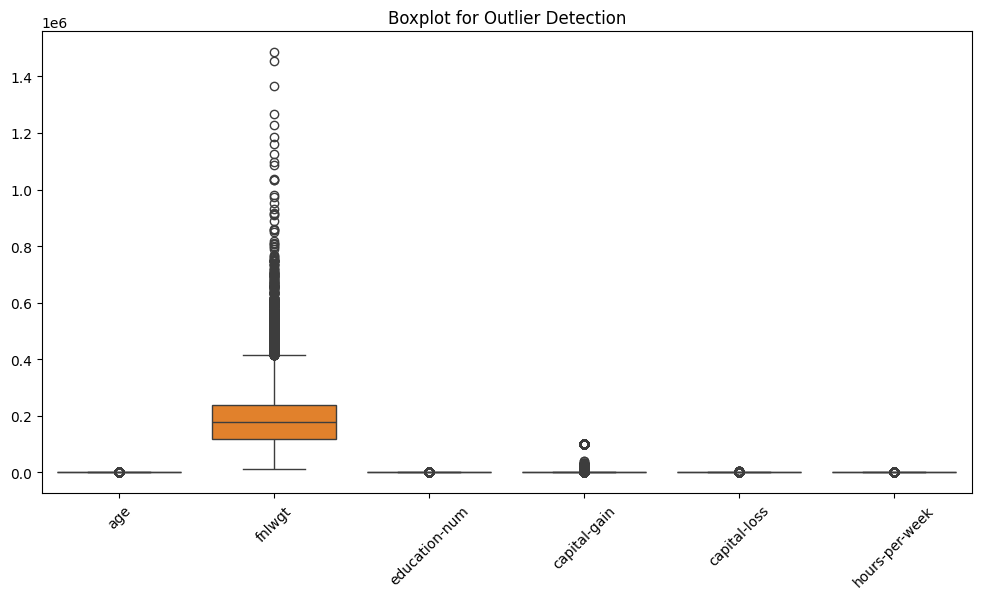

In [ ]:
# Folosesc un boxplot pentru vizualizarea de outlieri
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

Codul de mai sus creează un boxplot pentru a detecta outlieri în variabilele numerice din dataset.

Acest boxplot prezintă distribuția variabilelor numerice din dataset și evidențiază outlierii pentru fiecare dintre ele. Variabila fnlwgt (Final Weight) conține mulți outlieri având o distribuție întinsă, cu numeroase valori extreme peste percentila superioară.De asemenea, variabilele capital-gain și capital_income conțin outlieri vizibili
Celelalte variabile (age, education-num, capital-loss, hours-per-week, income) par să aibă distribuții mai controlate

Outlier detection and treatment (IQR Method)

In [13]:

for col in numerical_features:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] > upper_bound, upper_bound, np.where(data[col] < lower_bound, lower_bound, data[col]))
print("After outlier treatment:")
data.head(10)

After outlier treatment:


age         workclass    fnlwgt  education  education-num  \
0  39.0         State-gov   77516.0  Bachelors           13.0   
1  50.0  Self-emp-not-inc   83311.0  Bachelors           13.0   
2  38.0           Private  215646.0    HS-grad            9.0   
3  53.0           Private  234721.0       11th            7.0   
4  28.0           Private  338409.0  Bachelors           13.0   
5  37.0           Private  284582.0    Masters           14.0   
6  49.0           Private  160187.0        9th            5.0   
7  52.0  Self-emp-not-inc  209642.0    HS-grad            9.0   
8  31.0           Private   45781.0    Masters           14.0   
9  42.0           Private  159449.0  Bachelors           13.0   

          marital-status         occupation   relationship   race     sex  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4     Married-civ-spouse     Prof-specialty           Wife  Black  Female   
5     Married-civ-spouse    Exec-managerial           Wife  White  Female   
6  Married-spouse-absent      Other-service  Not-in-family  Black  Female   
7     Married-civ-spouse    Exec-managerial        Husband  White    Male   
8          Never-married     Prof-specialty  Not-in-family  White  Female   
9     Married-civ-spouse    Exec-managerial        Husband  White    Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0           0.0           0.0            40.0  United-States  <=50K  
1           0.0           0.0            32.5  United-States  <=50K  
2           0.0           0.0            40.0  United-States  <=50K  
3           0.0           0.0            40.0  United-States  <=50K  
4           0.0           0.0            40.0           Cuba  <=50K  
5           0.0           0.0            40.0  United-States  <=50K  
6           0.0           0.0            32.5        Jamaica  <=50K  
7           0.0           0.0            45.0  United-States   >50K  
8           0.0           0.0            50.0  United-States   >50K  
9           0.0           0.0            40.0  United-States   >50K

Acest cod detectează și corectează outlierii din variabilele numerice utilizând Interquartile Range (IQR).

În primul rând, codul iterează prin fiecare coloană numerică (numerical_features) pentru a detecta și corecta outlierii, mai departe, calculează prima (Q1, 25%) și a treia (Q3, 75%) quartilă a distribuției. De altfel, determină IQR-ul (IQR = Q3 - Q1), care măsoară intervalul dintre quartile.

Mai mult, codul calculează limitele pentru outlieri unde lower_bound = Q1 - 1.5 * IQR face ca orice valoare sub această limită să fie considerată outlier inferior iar upper_bound = Q3 + 1.5 * IQR  face ca orice valoare peste această limită să fie considerată outlier superior.

Astfel, se reduce impactul outlierilor extremi prin limitarea acestora la intervalul definit de IQR fiind și o metodă robustă pentru a evita ca valorile aberante să influențeze modelele de regresie.

#### Normalization / Standardization if necesarry

In [15]:
# Testez dacă este necesară standardizarea datelor
 
import matplotlib.pyplot as plt
numeric_columns = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
print(data[numeric_columns].describe())


                age         fnlwgt  education-num  capital-gain  capital-loss  \
count  32537.000000   32537.000000   32537.000000       32537.0       32537.0   
mean      38.559855  186824.961736      10.125165           0.0           0.0   
std       13.554847   95118.115529       2.459436           0.0           0.0   
min       17.000000   12285.000000       4.500000           0.0           0.0   
25%       28.000000  117827.000000       9.000000           0.0           0.0   
50%       37.000000  178356.000000      10.000000           0.0           0.0   
75%       48.000000  236993.000000      12.000000           0.0           0.0   
max       78.000000  415742.000000      16.000000           0.0           0.0   

       hours-per-week  
count    32537.000000  
mean        41.203246  
std          6.187352  
min         32.500000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         52.500000  


Acest cod verifică dacă standardizarea sau normalizarea datelor este necesară prin afișarea statisticilor descriptive ale variabilelor numerice din dataset.

fnlwgt are o scară mult mai mare (variază între 12.285 și 415.724), ceea ce sugerează că poate fi necesară standardizarea pentru a evita ca această variabilă să domine modelele de învățare automată.

capital-gain și capital-loss sunt doar 0, ceea ce indică fie o eroare în date, fie că aceste coloane nu sunt relevante în forma actuală



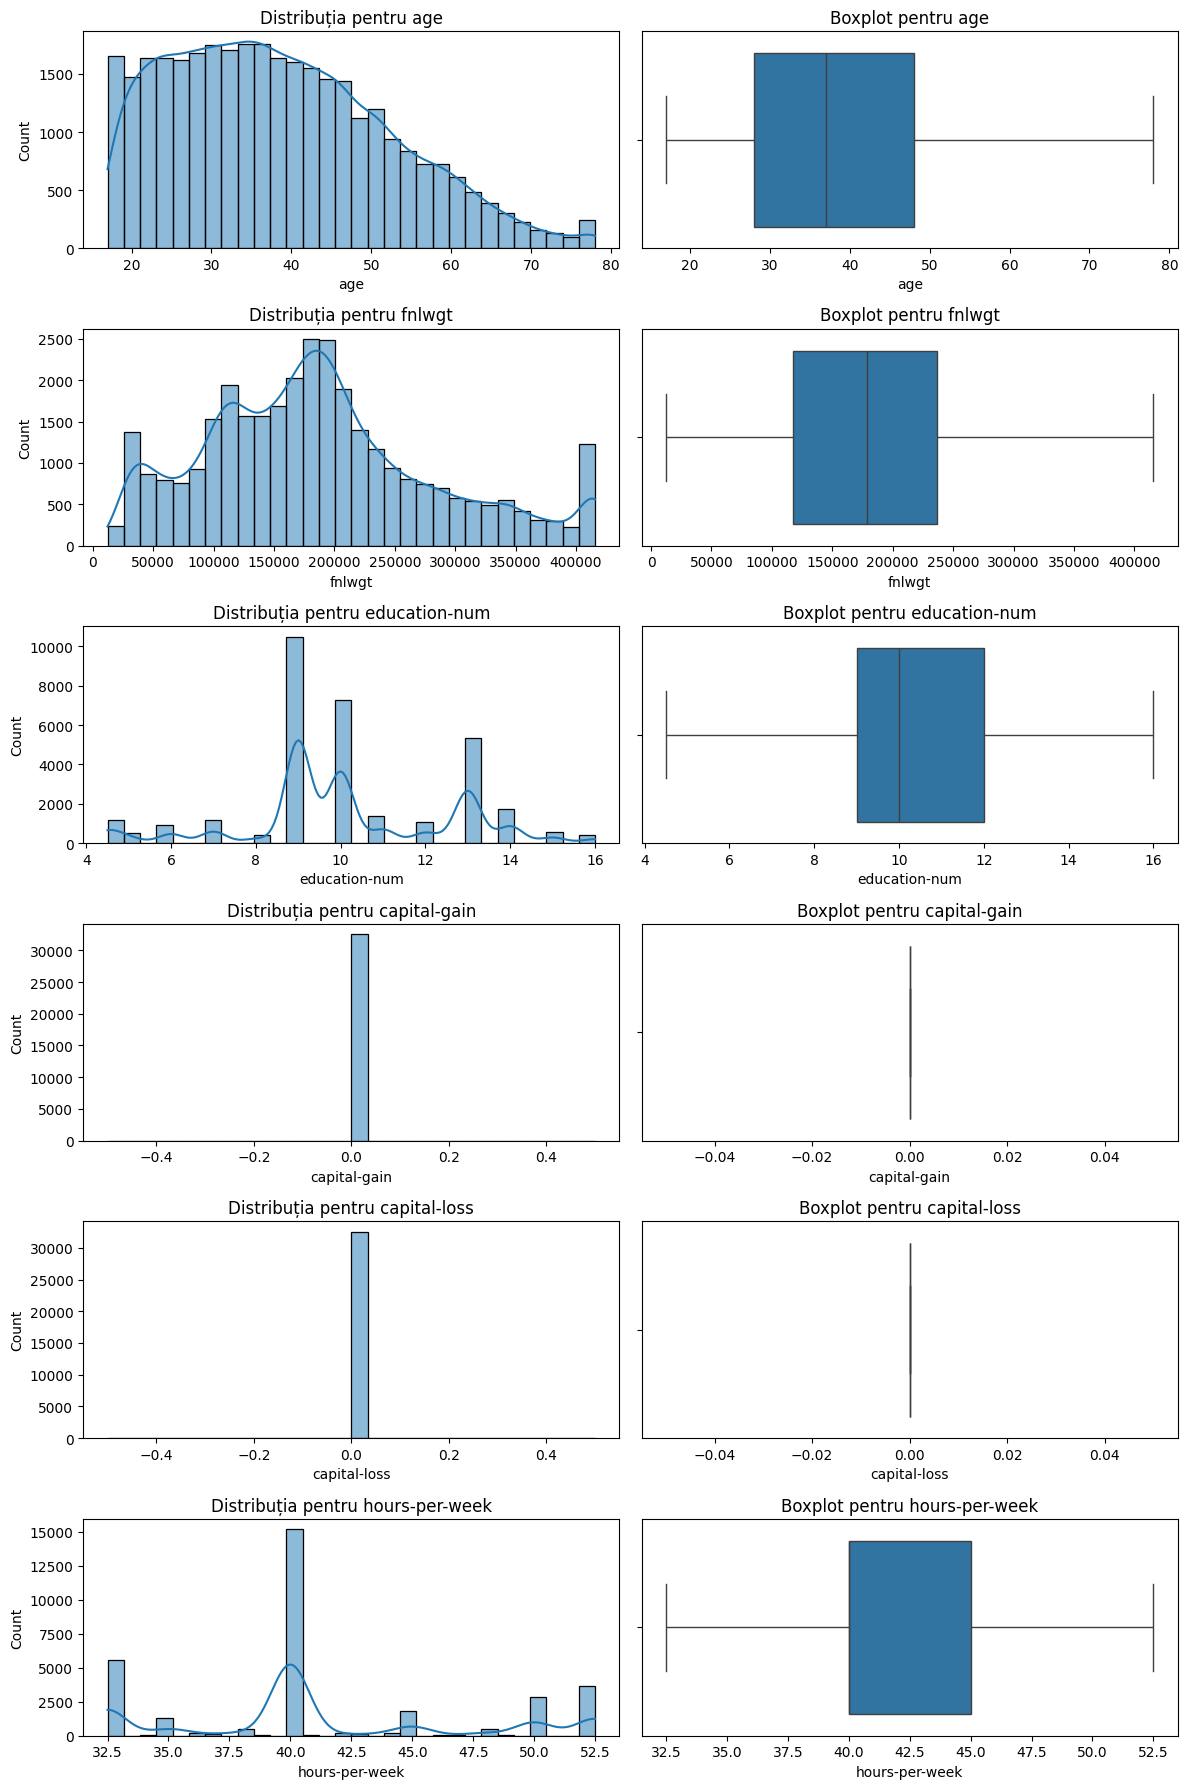

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista coloanelor numerice
numeric_columns = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

# Crearea subploților
fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(12, 18))

# Parcurgerea coloanelor numerice și afișarea distribuțiilor și boxplot-urilor
for i, column in enumerate(numeric_columns):
    # Histogramă cu Kernel Density Estimate (KDE)
    sns.histplot(data[column], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribuția pentru {column}")

    # Boxplot pentru detectarea outlierilor
    sns.boxplot(x=data[column], ax=axes[i, 1])
    axes[i, 1].set_title(f"Boxplot pentru {column}")

plt.tight_layout()
plt.show()


Acest cod creează vizualizări pentru analiza distribuției și detectarea outlierilor în variabilele numerice ale datasetului. Se definește o listă de coloane numerice și se generează două tipuri de grafice pentru fiecare coloană: (1) un histogramă cu KDE pentru a vizualiza distribuția datelor și (2) un boxplot pentru a identifica outlierii. 

Graficul pentru dstribuția vârstei (age) are o distribuție ușor asimetrică spre dreapta, cu cele mai multe valori între 20 și 50 de ani. Boxplot-ul nu indică outlieri semnificativi, ceea ce sugerează o distribuție relativ normală.

Variabila fnlwgt (final weight) are o distribuție multimodală, ceea ce indică mai multe grupuri distincte în date. Boxplot-ul arată că există câteva valori extreme, dar acestea nu sunt foarte pronunțate. Această variabilă are o scală mare, ceea ce sugerează că standardizarea sau normalizarea ar putea fi benefică.

Variabila education-num (nivelul de educație numeric) prezintă o distribuție neuniformă, cu valori concentrate la anumite niveluri (ex. 10, 12, 14, 16). A Boxplot-ul nu indică outlieri semnificativi.

capital-gain si capital-loss au o distributie extrem de asimetrica ceea ce poate să creeze probleme în ceea ce privește anumite modele de învățare automată.

Standardizarea datelor

In [17]:
# Standardizarea datelor 
from sklearn.preprocessing import StandardScaler
numeric_columns = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

In [19]:
scaler = StandardScaler()
data_standardized = data.copy()  # Creează o copie a datasetului original
data_standardized[numeric_columns] = scaler.fit_transform(data[numeric_columns])
print(data_standardized[numeric_columns].head())


        age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.032472 -1.149209       1.168918           0.0           0.0   
1  0.844002 -1.088284       1.168918           0.0           0.0   
2 -0.041304  0.303007      -0.457496           0.0           0.0   
3  1.065329  0.503550      -1.270703           0.0           0.0   
4 -0.779058  1.593665       1.168918           0.0           0.0   

   hours-per-week  
0       -0.194472  
1       -1.406640  
2       -0.194472  
3       -0.194472  
4       -0.194472  


Codul aplică standardizarea datelor numerice folosind StandardScaler din sklearn.preprocessing și importă StandardScaler pentru scalarea datelor.

Definește coloanele numerice care trebuie standardizate și creează o copie a datasetului (data_standardized = data.copy()) pentru a păstra datele originale.

Aplică standardizarea (StandardScaler().fit_transform()) asupra coloanelor numerice astfel încât valorile sunt transformate astfel încât să aibă media = 0 și deviația standard = 1.

Toate valorile sunt acum centrate în jurul 0, ceea ce înseamnă că scara variabilelor este uniformizată iar coloana fnlwgt avea inițial o variație mare, iar acum valorile sunt aduse la o scară comparabilă cu celelalte variabile.

capital-gain și capital-loss rămân 0 în majoritatea rândurilor, ceea ce confirmă că aceste variabile sunt puternic dezechilibrate și pot necesita tratament suplimentar (ex. transformare binară).

#### Feature engeneering

In [21]:
# Creează o copie a datasetului pentru a evita modificarea directă
data_no_outliers = data.copy()

# Gruparea vârstei în categorii
bins = [0, 18, 35, 50, 65, 100]
labels = ["copil", "tânăr", "adult", "vârstnic", "senior"]

# Crearea unei noi coloane 'age_group'
data_no_outliers["age_group"] = pd.cut(data_no_outliers["age"], bins=bins, labels=labels)

# Verificare
print(data_no_outliers[["age", "age_group"]].head())



    age age_group
0  39.0     adult
1  50.0     adult
2  38.0     adult
3  53.0  vârstnic
4  28.0     tânăr


Acest cod creează o nouă variabilă categorială age_group, care grupează vârstele în cinci categorii și se creează o copie a datasetului (data_no_outliers = data.copy()) pentru a nu modifica direct data.

In [23]:
# Reîncărcare librării necesare după resetare
import pandas as pd

# Reîncărcare dataset și recreare 'age_group' 
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Citirea datelor
data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)

# Definirea intervalelor pentru gruparea vârstei
bins = [0, 18, 35, 50, 65, 100]
labels = ["copil", "tânăr", "adult", "vârstnic", "senior"]

# Crearea unui dataset nou și adăugarea coloanei 'age_group'
data_no_outliers = data.copy()
data_no_outliers["age_group"] = pd.cut(data_no_outliers["age"], bins=bins, labels=labels)

# Aplicare One-Hot Encoding pe variabila 'age_group'
data_encoded = pd.get_dummies(data_no_outliers, columns=['age_group'], prefix='age')

# Afișare rezultat
print(data_encoded.head())



   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  \
0          2174             0              40  United-States  <=50K   
1             0             0           

#### Encoding pentru toate variabilele categoriale

In [26]:
print("Coloanele din data_encoded:\n", data_encoded.columns)


Coloanele din data_encoded:
 Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'age_copil', 'age_tânăr', 'age_adult',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=106)


In [27]:
categorical_columns = ["workclass", "education", "marital-status", 
                       "occupation", "relationship", "race", "sex", "native-country"]

# Verificăm ce coloane sunt în dataset
existing_categorical = [col for col in categorical_columns if col in data_no_outliers.columns]
print("Coloane existente pentru encoding:", existing_categorical)

# Aplicăm One-Hot Encoding doar pe coloanele care există
data_encoded = pd.get_dummies(data_no_outliers, columns=existing_categorical, drop_first=True)

print(data_encoded.head())  # Verificare


Coloane existente pentru encoding: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

  income age_group  workclass_Federal-gov  workclass_Local-gov  ...  \
0  <=50K     adult                  False                False  ...   
1  <=50K     adult                  False                False  ...   
2  <=50K     adult                  False                False  ...   
3  <=50K  vârstnic                  False                False  ...   
4  <=50K     tânăr                  Fal

Acest cod aplică One-Hot Encoding doar pe variabilele categoriale existente în dataset, evitând astfel erori cauzate de lipsa unor coloane. Mai întâi, definește lista de coloane categoriale (workclass, education, marital-status, occupation, relationship, race, sex, native-country). Apoi, verifică ce coloane din această listă sunt efectiv prezente în datasetul data_no_outliers și le salvează într-o nouă listă (existing_categorical). După această verificare, aplică One-Hot Encoding folosind pd.get_dummies(), transformând fiecare categorie într-o coloană binară (0 sau 1), și elimină prima categorie din fiecare set de variabile pentru a evita probleme de multicolinearitate (drop_first=True). În final, codul afișează primele rânduri ale datasetului transformat pentru verificare. Acest proces este esențial pentru pregătirea datelor înainte de a aplica modele de regresie sau clasificare, asigurând compatibilitatea acestora cu algoritmii de Machine Learning.









Rezultatul afișează datasetul după aplicarea One-Hot Encoding pe variabilele categoriale existente. În partea superioară, vedem coloanele originale ale datasetului, inclusiv variabile numerice precum age, fnlwgt, education-num, capital-gain, capital-loss și hours-per-week. În partea inferioară, apar noile coloane generate de encoding pentru variabilele categoriale, cum ar fi workclass_Federal-gov, workclass_Local-gov, și diferitele valori ale native-country (ex. native-country_Portugal, native-country_Puerto-Rico, native-country_Taiwan). Aceste coloane sunt acum transformate în variabile binare (True/False sau 1/0), ceea ce le face compatibile cu modelele de Machine Learning. Acest pas este esențial pentru antrenarea unor modele precum Regresia Liniară sau Arbori de Decizie, care necesită ca toate variabilele de intrare să fie numerice.

#### Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_encoded["income"] = label_encoder.fit_transform(data_encoded["income"])
print(data_encoded[["income"]].head(10))


   income
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       1
8       1
9       1


Acest cod aplică Label Encoding pe coloana "income" din datasetul data_encoded, transformând valorile categoriale (<=50K și >50K) în valori numerice (0 și 1)

In [30]:
print(label_encoder.classes_)  # Vezi mapping-ul original


[0 1]


Train test split, save it

In [31]:
# Importarea bibliotecilor necesare
from sklearn.model_selection import train_test_split
import pandas as pd
import joblib  # Pentru salvarea seturilor de date


In [32]:
# Definirea variabilelor independente (X) și a variabilei dependente (y)
X = data_encoded.drop(columns=["income"])  # Eliminăm coloana țintă
y = data_encoded["income"]  # Definim variabila țintă (ce vrem să prezicem)

In [33]:
# Împărțirea datelor în set de antrenare (80%) și set de testare (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Afișarea dimensiunilor seturilor pentru verificare
print("Dimensiunea setului de antrenare:", X_train.shape, y_train.shape)
print("Dimensiunea setului de testare:", X_test.shape, y_test.shape)

Dimensiunea setului de antrenare: (26048, 101) (26048,)
Dimensiunea setului de testare: (6513, 101) (6513,)


In [35]:
# Salvarea seturilor de date pentru utilizare ulterioară
joblib.dump(X_train, "X_train.pkl")
joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_train, "y_train.pkl")
joblib.dump(y_test, "y_test.pkl")


['y_test.pkl']

In [36]:
print("Seturile de date au fost salvate cu succes!")

Seturile de date au fost salvate cu succes!


Salvare ca CSV

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Definirea variabilelor independente (X) și a variabilei dependente (y)
X = data_encoded.drop(columns=["income"])  # Eliminăm coloana țintă
y = data_encoded["income"]  # Definim variabila țintă

# Împărțirea datelor în set de antrenare (80%) și set de testare (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afișarea dimensiunilor seturilor pentru verificare
print("Dimensiunea setului de antrenare:", X_train.shape, y_train.shape)
print("Dimensiunea setului de testare:", X_test.shape, y_test.shape)

# Salvarea seturilor de date în fișiere CSV
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Seturile de date au fost salvate cu succes în format CSV!")


Dimensiunea setului de antrenare: (26048, 101) (26048,)
Dimensiunea setului de testare: (6513, 101) (6513,)
Seturile de date au fost salvate cu succes în format CSV!
